### anova 변수는 그룹별로 차이가 있는지 확인하는 것이기때문에 그룹을 이루는 변수는 범주형변수!
따라서 범주형 변수를 사용한다.

[array([243., 251., 275., 291., 347., 354., 380., 392.]), array([206., 210., 226., 249., 255., 273., 285., 295., 309.]), array([241., 258., 270., 293., 328.])]


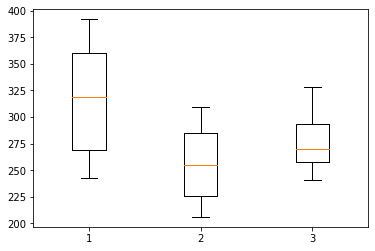

In [1]:
# 분산분석에는 여러 종류가 있지만, 여기서는 일원분산분석(One-way ANOVA)과 이원분산분석(Two-way ANOVA)를 알아보겠다.
# 1) 일원분산분석(One-way ANOVA)
#  종속변인은 1개이며, 독립변인의 집단도 1개인 경우다.
#  한 가지 변수의 변화가 결과 변수에 미치는 영향을 보기 위해 사용된다.
# 파이썬에서 One-way ANOVA 분석은 scipy.stats이나 statsmodel 라이브러리를 이용해서 할 수 있다.
# statsmodel 라이브러리가 좀 더 많고 규격화된 정보를 제공한다.

# 예제) 22명의 심장 우회 수술을 받은 환자를 다음의 3가지 그룹으로 나누었다.
#  Group I  : 50% 아산화 질소(nitrous oxide)와 50%의 산소(oxygen) 혼합물을 24시간 동안 흡입한 환자
#  Group II : 50% 아산화 질소와 50% 산소 혼합물을 수술 받는 동안만 흡입한 환자
#  Group III : 아산화 질소 없이 오직 35-50%의 산소만 24시간 동안 처리한 환자
#  그런 다음 적혈구의 엽산 수치를 24시간 이후에 측정하였다.

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import urllib  # url로 데이터 얻어오기

url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[: ,1 ]==1 ,0]
group2 = data[data[: ,1 ]==2 ,0]
group3 = data[data[: ,1 ]==3 ,0]

# matplotlib plotting
plot_data = [group1, group2, group3]
print(plot_data)


ax = plt.boxplot(plot_data)
plt.show()

# Boxplot에서 볼 수 있듯이, 평균값의 차이가 실제로 의미가 있는 차이인지, 분산이 커서 그런 것인지 애매한 상황이다.
# 이런 상황에서 분산분석을 통해 통계적 유의성을 알아 볼 수 있다.
# Scipy.stats으로 일원분산분석 : 아래와 같은 코드로 분산분석을 할 수 있다.

In [ ]:
import scipy.stats as stats
f_statistic, pval = stats.f_oneway(group1, group2, group3)
print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(f_statistic, pval))  # F=3.7, p=0.04359

if pval < 0.05:
    print('P-value 값이 유의수준 보다 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이가 남.')


Altman 910 데이터의 일원분산분석 결과 : F=3.7, p=0.04359
P-value 값이 유의수준 보다 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이가 남.


In [ ]:
# 이번에는 pandas와 statsmodels 라이브러리를 사용해서 분산분석을 수행.
# Statsmodel을 사용한 일원분산분석

import statsmodels.formula.api as smf
import statsmodels.api as sm
#import warnings  # 경고 메세지 무시하기
#warnings.filterwarnings('ignore')

df = pd.DataFrame(data, columns=['value', 'treatment']) #범주변수
# the "C" indicates categorical data

model = smf.ols('value ~ C(treatment)', df).fit()
print(sm.stats.anova_lm(model))  # statsmodels 을 사용하면 간편하게 결과를 얻을 수 있다.

#                 df        sum_sq      mean_sq         F         PR(>F)
# C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
# Residual      19.0  39716.097222  2090.320906       NaN       NaN

print()

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN

